In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def density_water(T):
    '''Density (rho) of water in kg/m^3 based on fluid temperature (T) nearest the flow meter in degrees Celsius'''

    rho = (999.85+5.332*(10**-2)*T-7.564*(10**-3)*(T**2)+4.323*(10**-5)*(T**3)-1.673*(10**-7)*(T**4)+2.447*(10**-10)*(T**5))
    return(rho)

def specific_heat_water(T):
    '''Specific heat (cp) of water in J/(kg K) based on mean fluid temperature (T) in degrees Celsius'''
    cp = (4.2184-2.8218*(10**-3)*T+7.3478*(10**-5)*(T**2)-9.4712*(10**-7)*(T**3)+7.2869*(10**-9)*(T**4)-2.8098*(10**-11)*(T**5)
          +4.4008*(10**-14)*(T**6))*1000
    return(cp)


def logistic(x, L, k, x0, b):
    '''Logistic function to fit the data'''
    return L / (1 + np.exp((x0-x) / k)) + b

a = 90.4 # side length of top surface
layer_height = 1 # water layer height

volume_per_layer = []
area_per_layer = [a**2]
side_area_per_layer = []
for _ in range(1, 17):
        
    b = a - 4 # the slope is 1:2 thus giving 1 m length at each side
    layer_volume = layer_height / 3 *(a**2 + a*b + b**2)
    side_area = 1/2 * (a + b) * 4
    volume_per_layer.append(layer_volume)
    area_per_layer.append(b**2)
    side_area_per_layer.append(side_area)
    a = b

volume_per_layer = pd.Series(volume_per_layer).round(0)
volume_per_layer = volume_per_layer[::-1].reset_index(drop=True)

area_per_layer = pd.Series(area_per_layer)
area_per_layer = area_per_layer[::-1].reset_index(drop=True)

side_area_per_layer = pd.Series(side_area_per_layer).round(0)
side_area_per_layer = side_area_per_layer[::-1].reset_index(drop=True)

df = pd.read_csv('../data/processed/dronninglund/water_sensors.csv', parse_dates=True, index_col=0) 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,t
2014-05-01 00:00:00+01:00,34.000000,34.725000,36.191667,38.208333,40.533333,41.833333,42.550000,43.25,43.9,44.700000,46.250000,48.250000,56.416667,65.891667,75.458333,76.458333,0.0
2014-05-01 01:00:00+01:00,33.991667,34.725000,36.183333,38.183333,40.516667,41.833333,42.541667,43.25,43.9,44.691667,46.216667,48.183333,56.250000,65.800000,75.408333,76.408333,1.0
2014-05-01 02:00:00+01:00,33.975000,34.691667,36.191667,38.175000,40.508333,41.850000,42.550000,43.25,43.9,44.658333,46.141667,48.133333,56.125000,65.666667,75.283333,76.391667,2.0
2014-05-01 03:00:00+01:00,33.958333,34.666667,36.191667,38.216667,40.500000,41.850000,42.550000,43.25,43.9,44.683333,46.075000,48.091667,55.966667,65.550000,75.225000,76.350000,3.0
2014-05-01 04:00:00+01:00,33.966667,34.666667,36.166667,38.158333,40.491667,41.808333,42.550000,43.25,43.9,44.650000,46.000000,48.041667,55.791667,65.400000,75.091667,76.400000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58484.0
2020-12-31 21:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58485.0
2020-12-31 22:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58486.0
2020-12-31 23:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58487.0


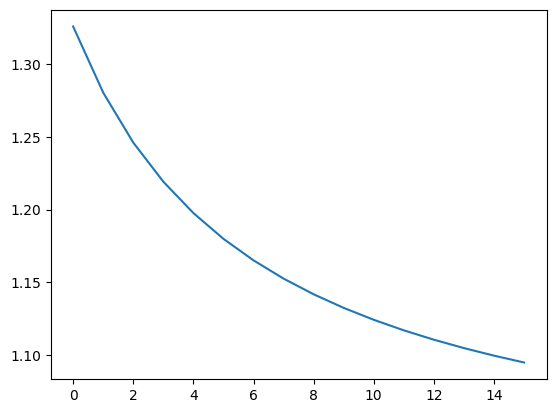

In [2]:

# plt.plot( 1/ volume_per_layer.values)
plt.plot( area_per_layer.values[1:] /area_per_layer.values[:-1])
# plt.plot((area_per_layer[1:].values / area_per_layer.iloc[:-1].values))


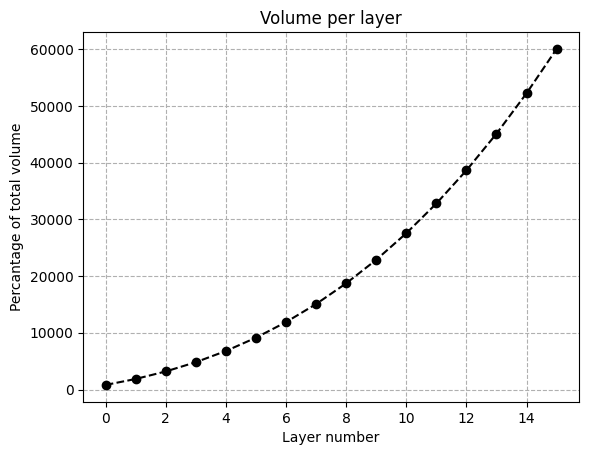

In [3]:
volume_per_layer.cumsum().plot(linestyle = '--', marker = 'o', color = 'black', label = 'Volume per layer') 
plt.xlabel('Layer number')
plt.ylabel('Percantage of total volume')
plt.title('Volume per layer')
plt.grid(linestyle = '--');

In [4]:
volume_per_layer.mean()

3751.8125

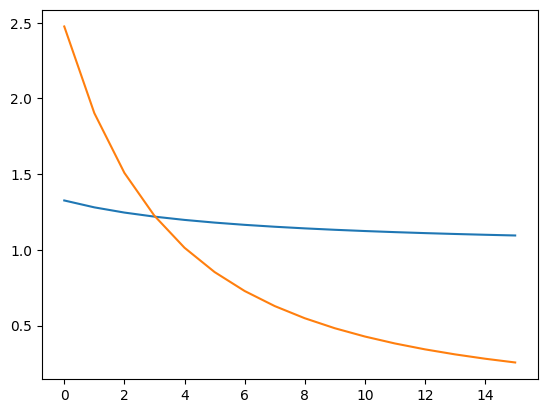

In [5]:
plt.plot(area_per_layer[1:].values / area_per_layer[:-1].values)
plt.plot(1/volume_per_layer.values * 2000)

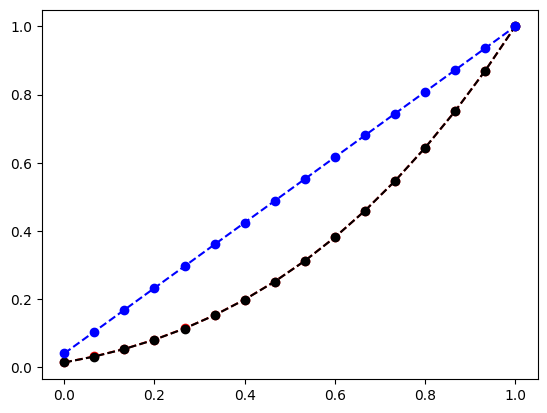

In [6]:
t = np.linspace(0,1,16)
l = logistic(t, 60, k = 0.001, x0 = 0, b= 20)
q = density_water(l) * volume_per_layer
plt.plot(t, (q / q.sum()).cumsum(), linestyle = '--', marker = 'o', color = 'red', label = 'Logistic function')
plt.plot(t, (volume_per_layer / volume_per_layer.sum()).cumsum(), linestyle = '--', marker = 'o', color = 'black', label = 'Volume per layer')
plt.plot(t, (l / l.sum()).cumsum(), linestyle = '--', marker = 'o', color = 'blue', label = 'Density')

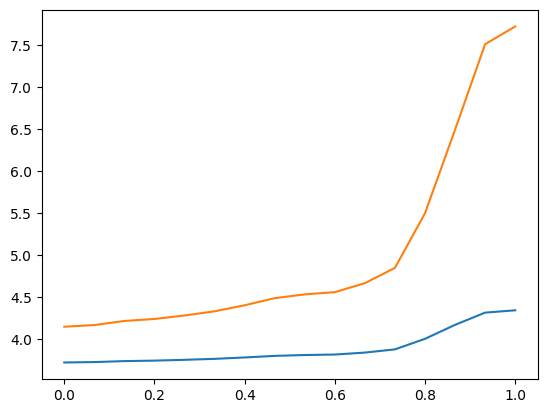

In [7]:
np.log(df.iloc[100, 0:16]).sum(), df.iloc[100, 0:16].sum()
plt.plot(t, np.log(df.iloc[100, 0:16]))
plt.plot(t, df.iloc[100, 0:16] / 10)

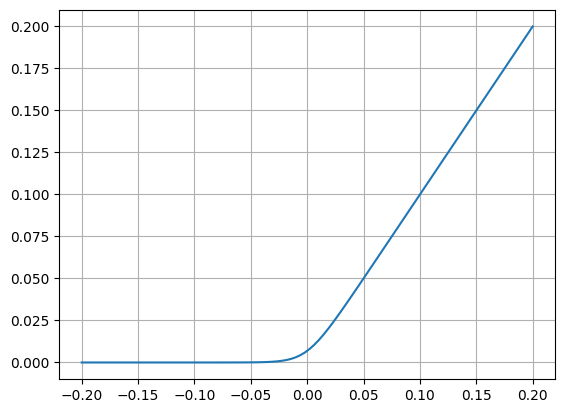

In [17]:
f = lambda x: np.log(1 + np.exp(100*x))/100
x = np.linspace(-0.2, 0.2, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.grid()
# ax.plot(volume_per_layer[:-1].values / volume_per_layer[1:].values)